<a href="https://colab.research.google.com/github/RyanSaul85/Data_Scientist_Salary/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Scientist Salaries Depending On Company Variables**


# **Importing and cleaning the data.**
# I am going to sort some columns, remove invalid data or null values, create some columns, get rid of some symbols, get some averages, find some mins and maxs.


In [ ]:
# Importing everything at the beginning for organization

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Getting the data

url = 'https://raw.githubusercontent.com/RyanSaul85/master/master/data_cleaned_2021%20-%20data_cleaned_2021.csv'

data = pd.read_csv(url)

In [ ]:
# Showing the first 5 rows of the dataset to get an understanding of columns, format, etc

data.head()

,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [ ]:
# Getting a list of the different job titles in the 'job_title_sim' column

data.job_title_sim.value_counts().index.tolist()

['data scientist',
 'other scientist',
 'data engineer',
 'analyst',
 'machine learning engineer',
 'Data scientist project manager',
 'na',
 'data analitics',
 'data modeler',
 'director']

In [ ]:
# Checking the difference in 'Job Title' and 'job_title_sim

data[['Job Title' , 'job_title_sim']]

,Job Title,job_title_sim
0,Data Scientist,data scientist
1,Healthcare Data Scientist,data scientist
2,Data Scientist,data scientist
3,Data Scientist,data scientist
4,Data Scientist,data scientist
...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",other scientist
738,Senior Data Engineer,data engineer
739,"Project Scientist - Auton Lab, Robotics Institute",other scientist
740,Data Science Manager,data scientist


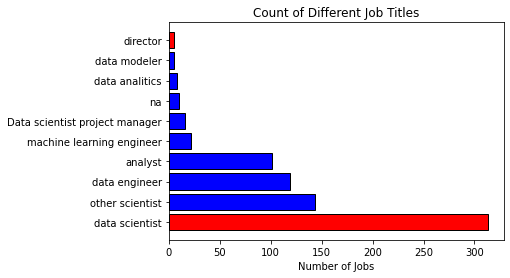

In [ ]:
# Looking at the totals of different job titles

plt.barh(data.job_title_sim.value_counts().index, data.job_title_sim.value_counts().values, color=('r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'), edgecolor='black')
plt.title('Count of Different Job Titles')
plt.xlabel('Number of Jobs');

In [ ]:
# Checking the 'na' in the 'job_title_sim' column

data[['Job Title' , 'job_title_sim']][data.job_title_sim == 'na']

,Job Title,job_title_sim
89,Data Management Specialist,na
191,Software Engineer - Data Visualization,na
300,Data Operations Lead,na
316,Software Engineer - Data Visualization,na
374,"Enterprise Architect, Data",na
388,"Technology-Minded, Data Professional Opportuni...",na
441,Software Engineer - Data Visualization,na
561,"Enterprise Architect, Data",na
586,"Technology-Minded, Data Professional Opportuni...",na
643,"Senior Engineer, Data Management Engineering",na


In [ ]:
# Dropping the 'na' rows since none are titled data scientists

data.drop(axis = 0 , index = data[data.job_title_sim == 'na'].index , inplace = True )

In [ ]:
# Checking the 'other scientist' in the 'job_title_sim' column

data[['Job Title' , 'job_title_sim']][data.job_title_sim.str.startswith('other')]

,Job Title,job_title_sim
8,Research Scientist,other scientist
16,"Scientist I/II, Biology",other scientist
43,Scientist,other scientist
48,Spectral Scientist/Engineer,other scientist
69,R&D Data Analysis Scientist,other scientist
...,...,...
729,"Associate Scientist, LC/MS Biologics",other scientist
730,"Research Scientist, Immunology - Cancer Biology",other scientist
737,"Sr Scientist, Immuno-Oncology - Oncology",other scientist
739,"Project Scientist - Auton Lab, Robotics Institute",other scientist


In [ ]:
# Dropping the 'other scientist' rows since none of the 'other scientist' posititons are data scientists

data.drop(axis = 0 , index = data[data.job_title_sim.str.startswith('other')].index , inplace = True)

Totals for each different job title:
 data scientist                    313
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64


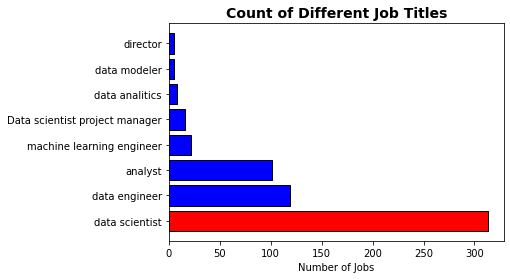

In [ ]:
# Recreating the bar chart without the 'na' and 'other scientist' rows
# There are a lot more data scientists than other job titles

plt.barh(data.job_title_sim.value_counts().index, data.job_title_sim.value_counts().values, color = ['r','b','b','b','b','b','b','b'], edgecolor='black')
plt.title('Count of Different Job Titles', fontweight='bold', fontsize=14)
plt.xlabel('Number of Jobs')

print('Totals for each different job title:\n', data['job_title_sim'].value_counts());

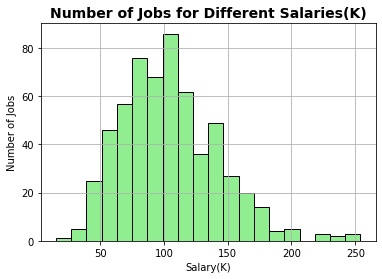

In [ ]:
# I chose to do a histogram plot with the Avg Salary(K) vs the number of jobs

data_avg_sal = data['Avg Salary(K)']
data_avg_sal.hist(bins = 20, color=['lightgreen'], edgecolor='black')
plt.title('Number of Jobs for Different Salaries(K)', fontweight='bold', fontsize=14)
plt.xlabel('Salary(K)')
plt.ylabel('Number of Jobs');

In [ ]:
# It appears to be normally distributed with the majority of salaries range from $80K to $120K

All Job Titles:
 count    589.00000
mean     104.91511
std       38.16388
min       15.50000
25%       77.50000
50%      101.00000
75%      127.50000
max      254.00000
Name: Avg Salary(K), dtype: float64

Only Data Scientists:
 count    329.000000
mean     116.101824
std       36.536185
min       15.500000
25%       87.500000
50%      111.500000
75%      140.000000
max      254.000000
Name: Avg Salary(K), dtype: float64



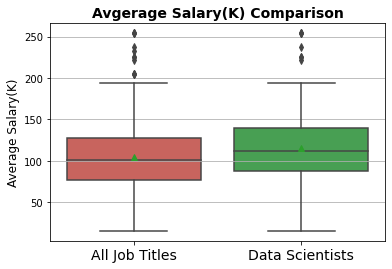

In [ ]:
data_ds = data[data.job_title_sim.str.contains('scientist')]

All_Job_Titles = data['Avg Salary(K)']
Data_Scientists = data_ds['Avg Salary(K)']
xlabels = [0,1]
xtick_labels = ['All Job Titles', 'Data Scientists']
sns.boxplot(data=[All_Job_Titles, Data_Scientists],
            palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
            showmeans=True,
            )
plt.title('Avgerage Salary(K) Comparison', fontweight='bold', fontsize=14)
plt.ylabel('Average Salary(K)', fontsize=12)
plt.xticks(xlabels, xtick_labels, fontsize=14)
plt.grid(axis='y')

print('All Job Titles:\n', data['Avg Salary(K)'].describe())
print()
print('Only Data Scientists:\n', data_ds['Avg Salary(K)'].describe())
print();

In [ ]:
# From the boxplot, it is very easy to see the most common range of salaries
# You can see that the Data Scientist mean salary is $116,101
# and the mean salary for all job titles is $104,915

# **What is the most popular job title?**

data scientist                    313
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64


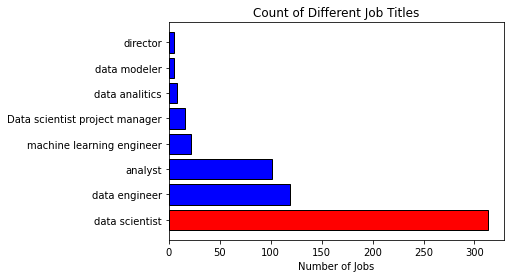

In [ ]:
# I chose the bar chart because it is simple and gets to the point
# It's very easy to see which job titles are used the most

plt.barh(data.job_title_sim.value_counts().index, data.job_title_sim.value_counts().values, color = ['r','b','b','b','b','b','b','b'], edgecolor='black')
plt.title('Count of Different Job Titles')
plt.xlabel('Number of Jobs');

print(data['job_title_sim'].value_counts())

# **What are the top companies using data scientists?**

In [ ]:
# Creating a new dataframe with 'scientist' in the 'job_title_sim' column

data_ds = data[data.job_title_sim.str.contains('scientist')]

In [ ]:
# Getting the counts of the 'data scientist' from 'job_title_sim' column

data_ds.job_title_sim.value_counts()

data scientist                    313
Data scientist project manager     16
Name: job_title_sim, dtype: int64

In [ ]:
# Getting the total counts of 'Data Scientists' for each company

data_ds_companies = data_ds['Company Name'].value_counts()
data_ds_companies.head(20)

PNNL\n3.8                                      10
Liberty Mutual Insurance\n3.3                   8
MITRE\n3.2                                      8
Novartis\n3.8                                   7
Numeric, LLC\n3.2                               6
MassMutual\n3.6                                 6
Pfizer\n4.0                                     6
Esri\n3.5                                       6
AstraZeneca\n3.9                                6
Maven Wave Partners\n4.4                        4
TransUnion\n3.9                                 4
Central California Alliance for Health\n3.5     4
h2o.ai\n4.3                                     4
Nuna\n4.2                                       4
Northrop Grumman\n3.7                           4
Zest AI\n3.9                                    4
Sartorius\n3.5                                  4
Juniper Networks\n3.8                           4
Novetta\n4.0                                    4
Visa Inc.\n3.7                                  3


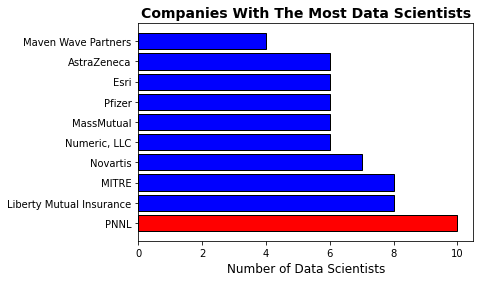

In [ ]:
# I chose the bar chart because it is simple and gets to the point
# It's very easy to see which companies use the most Data Scientists

plt.barh(data_ds['company_txt'].value_counts().index[:10] , data_ds['company_txt'].value_counts().values[:10], color=['r','b','b','b','b','b','b','b','b','b'], edgecolor=['black'])
plt.title('Companies With The Most Data Scientists', fontweight='bold', fontsize=14)
plt.xlabel('Number of Data Scientists', color = 'black', fontsize='12', horizontalalignment='center')
plt.yticks(rotation=0);

# **What are the top fields using data scientists?**

Biotech & Pharmaceuticals                  39
Computer Hardware & Software               30
Insurance Carriers                         30
Enterprise Software & Network Solutions    25
IT Services                                22
Advertising & Marketing                    18
Consulting                                 17
Aerospace & Defense                        14
Energy                                     12
Health Care Services & Hospitals           11
Federal Agencies                            8
Financial Analytics & Research              8
Banks & Credit Unions                       7
Internet                                    7
Staffing & Outsourcing                      7
Insurance Agencies & Brokerages             6
Real Estate                                 6
Logistics & Supply Chain                    4
Telecommunications Services                 4
Research & Development                      4
Investment Banking & Asset Management       4
Industrial Manufacturing          

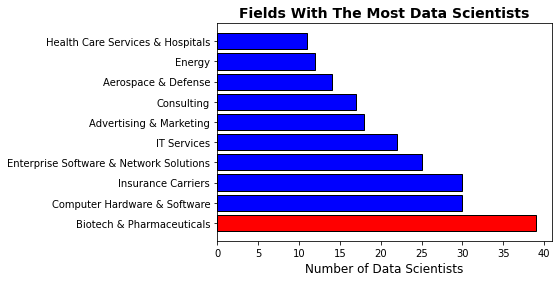

In [ ]:
# I chose the bar chart because it is simple and gets to the point
# It's very easy to see which fields use the most Data Scientists

plt.barh(data_ds['Industry'].value_counts().index[:10] , data_ds['Industry'].value_counts().values[:10], color= ['r','b','b','b','b','b','b','b','b','b'], edgecolor=['black'])
plt.title('Fields With The Most Data Scientists', fontweight='bold', fontsize=14)
plt.xlabel('Number of Data Scientists', color = 'black', fontsize='12', horizontalalignment='center')
print(data_ds['Industry'].value_counts());

# **Does the business industry impact the salary of Data Scientists?**

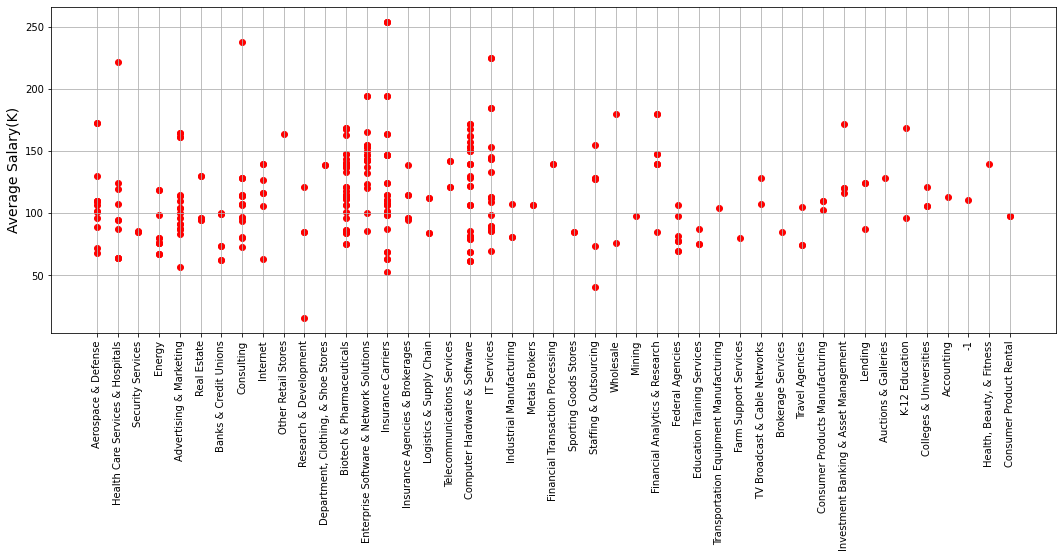

In [ ]:
# Here is a scatter plot of Industry vs Avg Salary(K)

data_ds_avg_sal = data_ds['Avg Salary(K)']

plt.figure(figsize=(18,6))
plt.scatter(data_ds['Industry'], data_ds['Avg Salary(K)'], color='r', marker='o')
plt.ylabel('Average Salary(K)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.grid(axis='y');

In [ ]:
# There are some clusters for a lot of different sectors, 
# but I do not see any direct correlation to a specific sector
# Now lets find the Average of the 'Avg Salary(K)' for the top sectors

In [ ]:
sector_bioph = data_ds.loc[data_ds['Industry'] == 'Biotech & Pharmaceuticals'].mean().round(5)
sector_cpu = data_ds.loc[data_ds['Industry'] == 'Computer Hardware & Software'].mean().round(5)
sector_ins = data_ds.loc[data_ds['Industry'] == 'Insurance Carriers'].mean().round(5)
sector_ent = data_ds.loc[data_ds['Industry'] == 'Enterprise Software & Network Solutions'].mean().round(5)
sector_it = data_ds.loc[data_ds['Industry'] == 'IT Services'].mean().round(5)
sector_adv = data_ds.loc[data_ds['Industry'] == 'Advertising & Marketing'].mean().round(5)
sector_cons = data_ds.loc[data_ds['Industry'] == 'Consulting'].mean().round(5)
sector_aero = data_ds.loc[data_ds['Industry'] == 'Aerospace & Defense'].mean().round(5)
sector_energy = data_ds.loc[data_ds['Industry'] == 'Energy'].mean().round(5)
sector_health = data_ds.loc[data_ds['Industry'] == 'Health Care Services & Hospitals'].mean().round(5)


print('Average salary for all Data Scientists is:                     ', data_ds['Avg Salary(K)'].mean())
print('Average salary for Biotech & Pharmaceuticals is:               ', sector_bioph['Avg Salary(K)'])
print('Average salary for Computer Hardware & Software is:            ', sector_cpu['Avg Salary(K)'])
print('Average salary for Insurance Carriers is:                      ', sector_ins['Avg Salary(K)'])
print('Average salary for Enterprise Software & Network Solutions is: ', sector_ent['Avg Salary(K)'])
print('Average salary for IT Services is:                             ', sector_it['Avg Salary(K)'])
print('Average salary for Advertising & Marketing is:                 ', sector_adv['Avg Salary(K)'])
print('Average salary for Consulting is:                              ', sector_cons['Avg Salary(K)'])
print('Average salary for Aerospace & Defense is:                     ', sector_aero['Avg Salary(K)'])
print('Average salary for Energy is:                                  ', sector_energy['Avg Salary(K)'])
print('Average salary for Health Care Services & Hospitals is:        ', sector_health['Avg Salary(K)'])


Average salary for all Data Scientists is:                      116.10182370820668
Average salary for Biotech & Pharmaceuticals is:                123.11538
Average salary for Computer Hardware & Software is:             119.01667
Average salary for Insurance Carriers is:                       129.66667
Average salary for Enterprise Software & Network Solutions is:  144.86
Average salary for IT Services is:                              127.04545
Average salary for Advertising & Marketing is:                  110.02778
Average salary for Consulting is:                               113.17647
Average salary for Aerospace & Defense is:                      110.67857
Average salary for Energy is:                                   83.70833
Average salary for Health Care Services & Hospitals is:         100.54545


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-p

In [ ]:
# Enterprise Software & Network Solutions has the highest mean salary

# **Does the company revenue affect the salary?**

In [ ]:
# The 'Revenue' column needs to be cleaned - $symbol and words
# It needs to have consistent units - converting all to millions

data_ds['Revenue'].value_counts()

Unknown / Non-Applicable            84
$10+ billion (USD)                  61
$1 to $2 billion (USD)              39
$100 to $500 million (USD)          29
$500 million to $1 billion (USD)    29
$50 to $100 million (USD)           18
$2 to $5 billion (USD)              17
$5 to $10 million (USD)             12
$25 to $50 million (USD)            11
$10 to $25 million (USD)            11
$5 to $10 billion (USD)             10
$1 to $5 million (USD)               5
Less than $1 million (USD)           3
Name: Revenue, dtype: int64

In [ ]:
# Removing the 'Unknown / Non-Applicable' values

data_ds_rev = data_ds[data_ds.Revenue != 'Unknown / Non-Applicable']
data_ds_rev['Revenue'].head()

0           $50 to $100 million (USD)
1              $2 to $5 billion (USD)
2          $100 to $500 million (USD)
3    $500 million to $1 billion (USD)
5              $1 to $2 billion (USD)
Name: Revenue, dtype: object

In [ ]:
# Removing the $ and other unnecessary strings and symbols
data_ds_rev_new = data_ds_rev['Revenue'].str.replace('$','')
data_ds_rev_new = data_ds_rev_new.str.replace(' ','')
data_ds_rev_new = data_ds_rev_new.str.replace('to','-')
data_ds_rev_new = data_ds_rev_new.str.replace('million','')
data_ds_rev_new = data_ds_rev_new.str.replace('billion','000')
data_ds_rev_new = data_ds_rev_new.str.replace('+','-10')
data_ds_rev_new = data_ds_rev_new.str.replace('(','')
data_ds_rev_new = data_ds_rev_new.str.replace(')','')
data_ds_rev_new = data_ds_rev_new.str.replace('USD','')
data_ds_rev_new = data_ds_rev_new.dropna(how='all')

data_ds_rev_new = data_ds_rev_new.str.split('-').str[1]

print(data_ds_rev_new.head(10))

0       100
1      5000
2       500
3      1000
5      2000
7        50
9       500
10     2000
11     2000
12    10000
Name: Revenue, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single chara

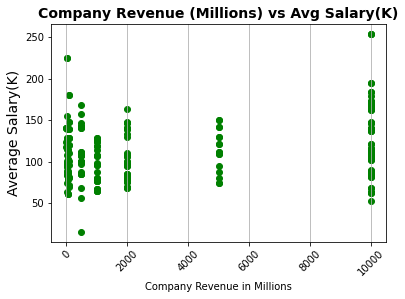

In [ ]:
data_ds_rev_new = data_ds_rev_new.astype(float)

plt.scatter(data_ds_rev_new, data_ds_rev['Avg Salary(K)'], color='green')
plt.title('Company Revenue (Millions) vs Avg Salary(K)', fontweight='bold', fontsize=14)
plt.ylabel('Average Salary(K)', fontsize=14)
plt.xlabel('Company Revenue in Millions')
plt.grid(axis='x')
plt.ticklabel_format()
plt.xticks(rotation=45);

In [ ]:
# I do not see any direct correlation with company revenue and average data scientist salaries
# other than the companies with revenue at $10 billion have more higher salaries,
# but also have a lot of lower salaries

In [ ]:
def company_by_revenue(revenue):
    if(revenue < 2500):
        return 'Low'
    
    elif(revenue < 6000):
        return 'Medium'
    
    else :
        return 'High'

In [ ]:
data_ds['co_revenue'] = data_ds_rev_new.apply(lambda x: company_by_revenue(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


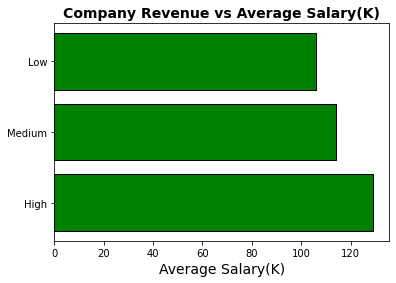

In [ ]:
data_ds_revenue = data_ds.groupby('co_revenue').mean().sort_values(by = 'Avg Salary(K)', ascending = False)

plt.barh(data_ds_revenue.index[:10] , data_ds_revenue['Avg Salary(K)'][:10], color='green', edgecolor='black')
plt.title('Company Revenue vs Average Salary(K)', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary(K)', fontsize=14);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


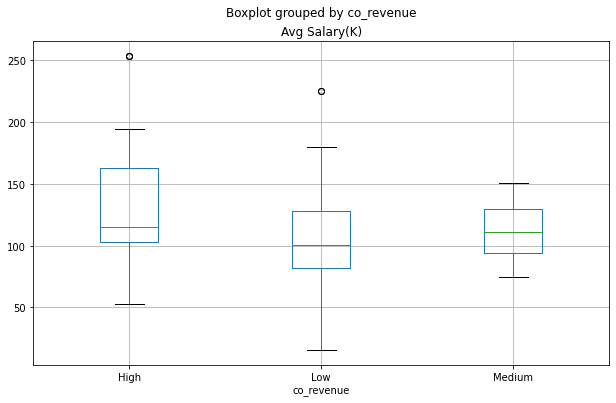

In [ ]:
data_ds.boxplot('Avg Salary(K)', by='co_revenue', figsize=(10, 6));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b638b1110>,
      dtype=object)

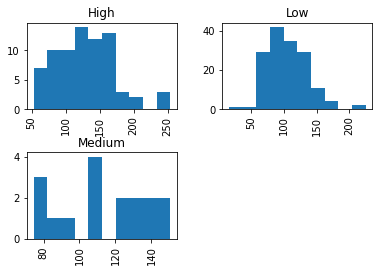

In [ ]:
data_ds['Avg Salary(K)'].hist(by = data_ds['co_revenue'])

In [ ]:
# Let's run the F_oneway test

Low = data_ds[data_ds['co_revenue'] == 'Low']
Medium = data_ds[data_ds['co_revenue'] == 'Medium']
High = data_ds[data_ds['co_revenue'] == 'High']


stats.f_oneway(Low['Avg Salary(K)'], Medium['Avg Salary(K)'], High['Avg Salary(K)'])

F_onewayResult(statistic=10.619865871029178, pvalue=3.7943299818341065e-05)

In [ ]:
# the p-value from the F_oneway test is < 0.05 therefore the means are not equal

In [ ]:
# let's check ttest values for each pair

print(stats.ttest_ind(Low['Avg Salary(K)'], Medium['Avg Salary(K)']))
print(stats.ttest_ind(Low['Avg Salary(K)'], High['Avg Salary(K)']))
print(stats.ttest_ind(Medium['Avg Salary(K)'], High['Avg Salary(K)']))

Ttest_indResult(statistic=-1.0444438027838248, pvalue=0.29777175004975337)
Ttest_indResult(statistic=-4.529019188004158, pvalue=9.592797494351334e-06)
Ttest_indResult(statistic=-1.3343434017024274, pvalue=0.18549535818264618)


In [ ]:
# let's run the Tukey's HSD test
data_ds['co_revenue'] = data_ds['co_revenue'].astype(str)
tukey = pairwise_tukeyhsd(endog = data_ds['Avg Salary(K)'], groups = data_ds['co_revenue'], alpha=0.05)

tukey.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-23.2031,0.001,-36.083,-10.3233,True
High,Medium,-14.9002,0.3978,-39.3909,9.5904,False
High,nan,-5.1485,0.7714,-19.666,9.369,False
Low,Medium,8.3029,0.7683,-14.9691,31.5749,False
Low,nan,18.0547,0.0011,5.7035,30.4058,True
Medium,nan,9.7518,0.7019,-14.465,33.9685,False


In [ ]:
print('The p-value for high and low is:    0.001')
print('The p-value for high and medium is: 0.3876')
print('The p-value for low and medium is:  0.6644')

The p-value for high and low is:    0.001
The p-value for high and medium is: 0.3876
The p-value for low and medium is:  0.6644


In [ ]:
# After looking at the different p-values for combination of low, medium and high, 
# I conclude that there is a significant difference in the means of high and low,
# but no significant different between low and medium, and medium and high

In [ ]:
# Let's conduct a Kruskal-Wallis test

stats.kruskal(Low['Avg Salary(K)'], Medium['Avg Salary(K)'], High['Avg Salary(K)'])

KruskalResult(statistic=16.297089591885072, pvalue=0.0002891558343591341)

In [ ]:
# The p-value for the Kruskal-Wallis test is < 0.05
# therefore the means are not equal

# **Does the company rating impact the salaries?**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


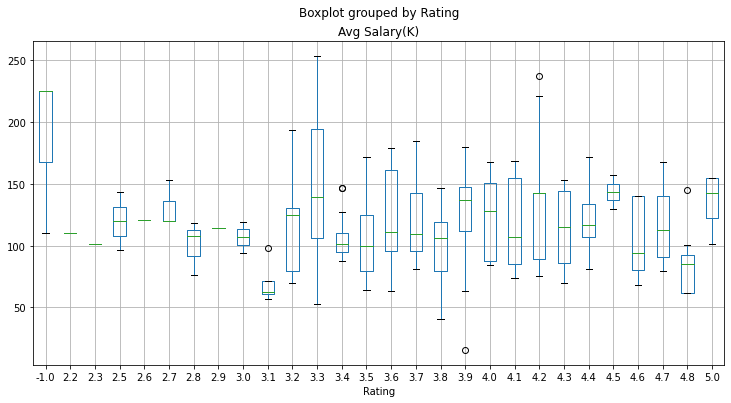

In [ ]:
data_ds.boxplot('Avg Salary(K)', by='Rating', figsize=(12, 6));

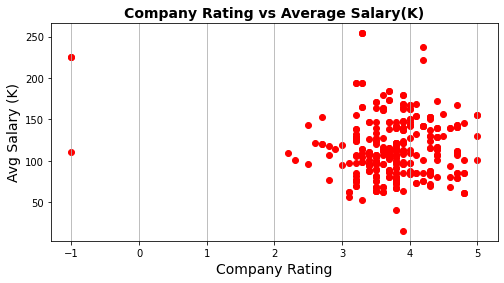

In [ ]:
# I am going to plot the 'Rating' of the company versus the Avg Salary(K)

plt.figure(figsize=(8,4))
plt.scatter(data_ds['Rating'], data_ds['Avg Salary(K)'], color='r')
plt.title('Company Rating vs Average Salary(K)', fontweight='bold', fontsize=14)
plt.xlabel('Company Rating', fontsize=14)
plt.ylabel('Avg Salary (K)', fontsize=14)
plt.grid(axis='x');

In [ ]:
# The points with Company Rating = -1 are null
# I do not see any correlation between the company rating and the average salary,
# but let's look into it a little more

In [ ]:
def company_by_rating(rating):
    if(np.isnan(rating)):
        return 'unknown'
    if(rating < 0):
        return 'Null'
    
    elif(rating < 3):
        return 'Low (0-3)'
    
    elif(rating < 4):
        return 'Medium (3-4)'

    else :
        return 'High (4-5)'

In [ ]:
data_ds['co_rating'] = data_ds.Rating.apply(lambda x: company_by_rating(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


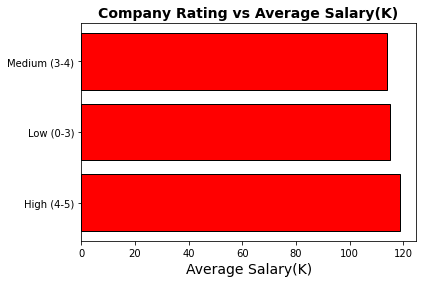

In [ ]:
data_ds_rating = data_ds.groupby('co_rating').mean().sort_values(by = 'Avg Salary(K)', ascending = False)
data_ds_rating = data_ds_rating[data_ds_rating['Rating'] != -1]

plt.barh(data_ds_rating.index[:10] , data_ds_rating['Avg Salary(K)'][:10], color='red', edgecolor='black')
plt.title('Company Rating vs Average Salary(K)', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary(K)', fontsize=14);

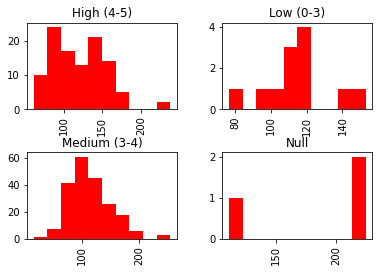

In [ ]:
# Let's perform some of the same tests as above to get some statistical data

data_ds['Avg Salary(K)'].hist(by = data_ds['co_rating'], color='red');

In [ ]:
# Let's try the F_oneway test

LowRating = data_ds[data_ds['co_rating'] == 'Low (0-3)']
MediumRating = data_ds[data_ds['co_rating'] == 'Medium (3-4)']
HighRating = data_ds[data_ds['co_rating'] == 'High (4-5)']

stats.f_oneway(LowRating['Avg Salary(K)'], MediumRating['Avg Salary(K)'], HighRating['Avg Salary(K)'])

F_onewayResult(statistic=0.6934104706834241, pvalue=0.5006109046434297)

In [ ]:
# the p-value from the F_oneway test is > 0.05 therefore there is a
# direct correlation between rating and salary.

In [ ]:
# let's check ttest values for each pair

print(stats.ttest_ind(LowRating['Avg Salary(K)'], MediumRating['Avg Salary(K)']))
print(stats.ttest_ind(LowRating['Avg Salary(K)'], HighRating['Avg Salary(K)']))
print(stats.ttest_ind(MediumRating['Avg Salary(K)'], HighRating['Avg Salary(K)']))

Ttest_indResult(statistic=0.12532687358485536, pvalue=0.9003802752741786)
Ttest_indResult(statistic=-0.36315768154174716, pvalue=0.7171480285639618)
Ttest_indResult(statistic=-1.1632752805703068, pvalue=0.24560672404265116)


In [ ]:
# let's run the Tukey's HSD test
data_ds['co_rating'] = data_ds['co_rating'].astype(str)
tukey = pairwise_tukeyhsd(endog = data_ds['Avg Salary(K)'], groups = data_ds['co_rating'], alpha=0.05)

tukey.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


group1,group2,meandiff,p-adj,lower,upper,reject
High (4-5),Low (0-3),-3.6627,0.9,-31.9697,24.6443,False
High (4-5),Medium (3-4),-5.0185,0.6298,-16.1097,6.0726,False
High (4-5),Null,68.0456,0.0074,13.6334,122.4578,True
Low (0-3),Medium (3-4),-1.3558,0.9,-28.9479,26.2364,False
Low (0-3),Null,71.7083,0.0117,11.7167,131.7,True
Medium (3-4),Null,73.0641,0.0031,19.0204,127.1078,True


In [ ]:
print('The p-value for high and low rating is:    0.9')
print('The p-value for high and medium rating is: 0.6298')
print('The p-value for low and medium rating is:  0.9')

The p-value for high and low rating is:    0.9
The p-value for high and medium rating is: 0.6298
The p-value for low and medium rating is:  0.9


In [ ]:
# After looking at the different p-values for combination of low, medium and high, 
# I conclude that there is not a significant difference in any combination and that
# there is a direct correlation between rating and salary

In [ ]:
# Let's conduct a Kruskal-Wallis test

stats.kruskal(LowRating['Avg Salary(K)'], MediumRating['Avg Salary(K)'], HighRating['Avg Salary(K)'])

KruskalResult(statistic=2.503927388239068, pvalue=0.28594274110877627)

In [ ]:
# The p-value for the Kruskal-Wallis test is > 0.05
# therefore the medians are equal

In [ ]:
# Let's check the confidence interval for all 3 grouped ratings against eachother

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print('Low vs Medium:  ', get_95_ci(LowRating['Avg Salary(K)'], MediumRating['Avg Salary(K)']))
print('Medium vs Low:  ', get_95_ci(MediumRating['Avg Salary(K)'], LowRating['Avg Salary(K)']))
print()
print('Low vs High:    ', get_95_ci(LowRating['Avg Salary(K)'], HighRating['Avg Salary(K)']))
print('High vs Low:    ', get_95_ci(HighRating['Avg Salary(K)'], LowRating['Avg Salary(K)']))
print()
print('Medium vs High: ', get_95_ci(MediumRating['Avg Salary(K)'], HighRating['Avg Salary(K)']))
print('High vs Medium: ', get_95_ci(HighRating['Avg Salary(K)'], MediumRating['Avg Salary(K)']))

Low vs Medium:   The difference in means at the 95% confidence interval (two-tail) is between -13.806683880618552 and 11.095145419080099.
Medium vs Low:   The difference in means at the 95% confidence interval (two-tail) is between -11.095145419080099 and 13.806683880618552.

Low vs High:     The difference in means at the 95% confidence interval (two-tail) is between -9.450779072953118 and 16.776250771066323.
High vs Low:     The difference in means at the 95% confidence interval (two-tail) is between -16.776250771066323 and 9.450779072953118.

Medium vs High:  The difference in means at the 95% confidence interval (two-tail) is between -3.2152257555870225 and 13.25223591523868.
High vs Medium:  The difference in means at the 95% confidence interval (two-tail) is between -13.25223591523868 and 3.2152257555870225.


# **What locations require the most data scientists?**

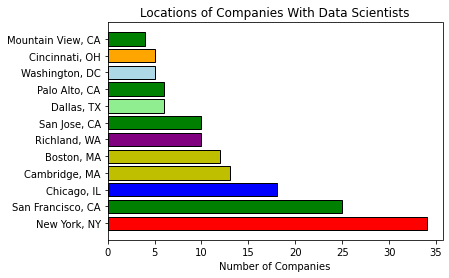

In [ ]:
# This chart is for the location that the company is in (city, state)

plt.barh(data_ds['Location'].value_counts().index[:12] ,data_ds['Location'].value_counts().values[:12], color=('r','g','b','y','y','purple','g','lightgreen','g','lightblue','orange','g'), edgecolor='black')
plt.title('Locations of Companies With Data Scientists')
plt.xlabel('Number of Companies');

# I have color coded the locations by state

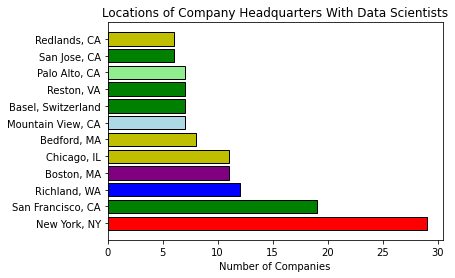

In [ ]:
# This chart is for the location that the company is headquartered in (city, state)

plt.barh(data_ds['Headquarters'].value_counts().index[:12] ,data_ds['Headquarters'].value_counts().values[:12], color=('r','g','b','purple','y','y','lightblue','g','g','lightgreen','g','y'), edgecolor='black')
plt.title('Locations of Company Headquarters With Data Scientists')
plt.xlabel('Number of Companies');

# I have color coded the headquarter locations by state

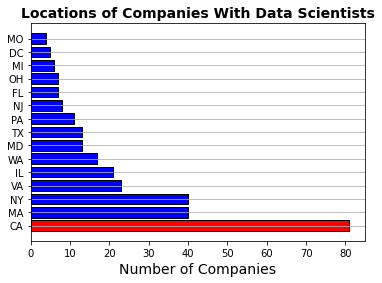

In [ ]:
# This chart is for the state that the job is located in

plt.barh(data_ds['Job Location'].value_counts().index[:15] ,data_ds['Job Location'].value_counts().values[:15], color=('r','b','b','b','b','b','b','b','b','b','b','b','b','b','b'), edgecolor='black')
plt.title('Locations of Companies With Data Scientists', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies', fontsize=14)
plt.grid(axis='y');

In [ ]:
# It's very obvious that California (CA) has the most companies with data scientists
# Let's take a look at grouping some states together

print('Job Locations:\n', data_ds['Job Location'].value_counts())

Job Locations:
 CA    81
MA    40
NY    40
VA    23
IL    21
WA    17
MD    13
TX    13
PA    11
NJ     8
FL     7
OH     7
MI     6
DC     5
MO     4
NC     3
IN     3
UT     3
AZ     3
WI     3
NM     3
GA     3
OR     3
CO     3
CT     2
KY     2
AL     1
TN     1
Name: Job Location, dtype: int64


In [ ]:
def company_by_region(location):

    if(location == 'CA' or location == 'WA' or location == 'OR' or location == 'AZ'):
        return 'West'
    
    elif(location == 'NY' or location == 'MA' or location == 'DC' or location == 'PA' or location == 'MD' or location == 'NJ' or location == 'CT' or location == 'VA'):
        return 'NorthEast'
    
    elif(location == 'FL' or location == 'TX' or location == 'GA' or location == 'AL' or location == 'KY' or location == 'TN' or location == 'NC'):
        return 'South'

    elif(location == 'CO' or location == 'UT' or location == 'NM' or location == 'OH' or location == 'MI'):
        return 'MidWest'

    elif(location == 'MO' or location == 'IN' or location == 'MI' or location == 'OH' or location == 'IL' or location == 'WI'):
        return 'Central'

    else :
        return 'Other'

NorthEast    142
West         104
Central       31
South         30
MidWest       22
Name: co_region, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


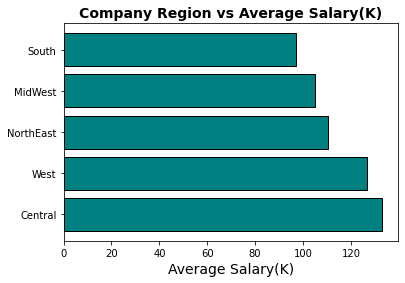

In [ ]:
data_ds['co_region'] = data_ds['Job Location'].apply(lambda x: company_by_region(x))

data_ds_region = data_ds.groupby('co_region').mean().sort_values(by = 'Avg Salary(K)', ascending = False)

plt.barh(data_ds_region.index[:10] , data_ds_region['Avg Salary(K)'][:10], color='teal', edgecolor='black')
plt.title('Company Region vs Average Salary(K)', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary(K)', fontsize=14);

print(data_ds['co_region'].value_counts())

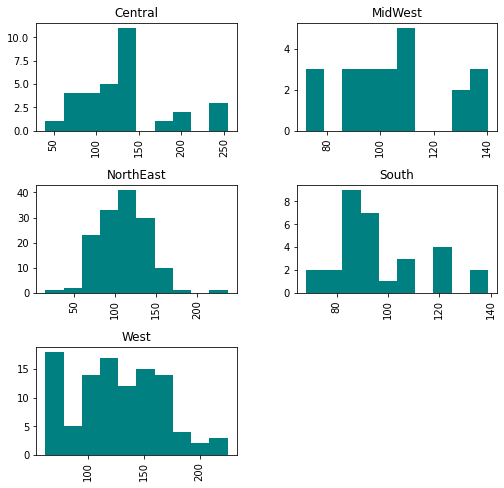

In [ ]:
data_ds['Avg Salary(K)'].hist(by = data_ds['co_region'], figsize=(8,8), color='teal', bins=10);

In [ ]:
# Let's try the F_oneway test

Central = data_ds[data_ds['co_region'] == 'Central']
West = data_ds[data_ds['co_region'] == 'West']
South = data_ds[data_ds['co_region'] == 'South']
NorthEast = data_ds[data_ds['co_region'] == 'NorthEast']
MidWest = data_ds[data_ds['co_region'] == 'MidWest']

stats.f_oneway(Central['Avg Salary(K)'], West['Avg Salary(K)'], South['Avg Salary(K)'], NorthEast['Avg Salary(K)'], MidWest['Avg Salary(K)'])

F_onewayResult(statistic=7.968495284041268, pvalue=3.8806239954363995e-06)

In [ ]:
# the p-value is < 0.05 so the the results are significant

# **Does the location of the company impact salaries?**

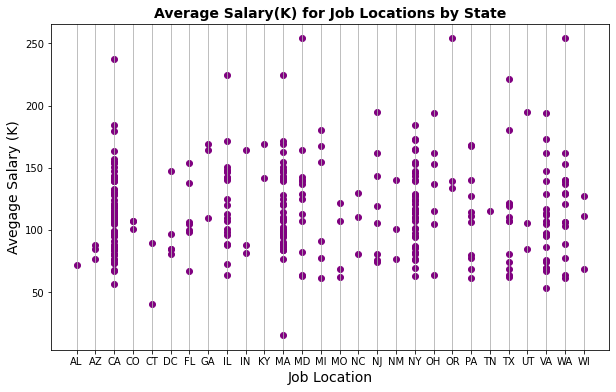

In [ ]:
# I am going to plot the job location versus the average salary

data_ds_job_location = data_ds['Job Location'].sort_values()

plt.figure(figsize=(10,6))
plt.scatter(data_ds_job_location, data_ds['Avg Salary(K)'], color='purple')
plt.title('Average Salary(K) for Job Locations by State', fontweight='bold', fontsize=14)
plt.xlabel('Job Location', fontsize=14)
plt.ylabel('Avegage Salary (K)', fontsize=14)
plt.grid(axis='x');

In [ ]:
# California (CA), Massachusetts (MA) and New York (NY) have the most locations for data scientists,
# but I don't see any specific correlation with 'Job Location' vs 'Avg Salary(K)

In [ ]:
data_ds_avg = data_ds['Avg Salary(K)'].mean()
data_ca = data_ds.loc[data_ds['Job Location'] == 'CA'].mean().round(2)
data_ny = data_ds.loc[data_ds['Job Location'] == 'NY'].mean().round(2)
data_ma = data_ds.loc[data_ds['Job Location'] == 'MA'].mean().round(2)
data_va = data_ds.loc[data_ds['Job Location'] == 'VA'].mean().round(2)

print('The average salary for data scientists is : ', data_ds_avg)
print('The average salary in California is:        ', data_ca['Avg Salary(K)'])
print('The average salary in New York is:          ', data_ny['Avg Salary(K)'])
print('The average salary in Massachusetts is:     ', data_ma['Avg Salary(K)'])
print('The average salary in Virginia      is:     ', data_va['Avg Salary(K)'])
print()

The average salary for data scientists is :  116.10182370820668
The average salary in California is:         134.3
The average salary in New York is:           115.25
The average salary in Massachusetts is:      104.08
The average salary in Virginia      is:      102.09



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ip

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'upper-right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


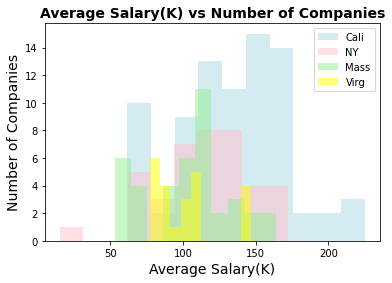

Cali:      DescribeResult(nobs=81, minmax=(61.5, 225.0), mean=134.2962962962963, variance=1499.423611111111, skewness=-0.11526535480081798, kurtosis=-0.14449940551542717)
New York:  DescribeResult(nobs=40, minmax=(15.5, 172.0), mean=115.25, variance=1066.4358974358975, skewness=-0.48062852974451353, kurtosis=0.5242437748618194)
Mass:      DescribeResult(nobs=40, minmax=(53.0, 164.0), mean=104.075, variance=863.4429487179488, skewness=0.030051922536149144, kurtosis=-0.6314783463883926)
Virginia:  DescribeResult(nobs=23, minmax=(77.5, 147.0), mean=102.08695652173913, variance=511.401185770751, skewness=0.8436539905444018, kurtosis=-0.4449528075971534)


In [ ]:
# lets perform some tests to see what happens

cali = data_ds[data_ds['Job Location'] == 'CA']
n_y = data_ds[data_ds['Job Location'] == 'NY']
mass = data_ds[data_ds['Job Location'] == 'MA']
virg = data_ds[data_ds['Job Location'] == 'VA']

plt.hist(cali['Avg Salary(K)'], alpha = .5, color='lightblue')
plt.hist(n_y['Avg Salary(K)'], alpha = .5, color='pink')
plt.hist(mass['Avg Salary(K)'], alpha = .5, color='lightgreen')
plt.hist(virg['Avg Salary(K)'], alpha = .5, color='yellow')
plt.title('Average Salary(K) vs Number of Companies', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary(K)', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend(('Cali', 'NY', 'Mass', 'Virg'), loc='upper-right');
plt.show()

print('Cali:     ', stats.describe(cali['Avg Salary(K)']))
print('New York: ', stats.describe(n_y['Avg Salary(K)']))
print('Mass:     ', stats.describe(mass['Avg Salary(K)']))
print('Virginia: ', stats.describe(virg['Avg Salary(K)']))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


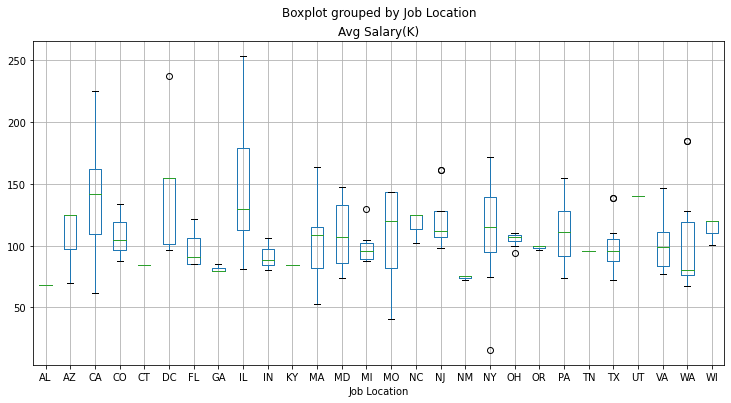

In [ ]:
data_ds.boxplot('Avg Salary(K)', by='Job Location', figsize=(12, 6));

In [ ]:
# I am going to run tests on the 4 most popular states for data scientists
# Shapiro-Wilk test

print('Shapiro - Cali:     ', stats.shapiro(cali['Avg Salary(K)']))
print('Shapiro - New York: ', stats.shapiro(n_y['Avg Salary(K)']))
print('Shapiro - Mass:     ', stats.shapiro(mass['Avg Salary(K)']))
print('Shapiro - Virg:     ', stats.shapiro(virg['Avg Salary(K)']))

# the W-values are all close to 1, which is great, 
# but the p-values are not all above 0.05

Shapiro - Cali:      (0.9601702690124512, 0.012955140322446823)
Shapiro - New York:  (0.9598338007926941, 0.1653202325105667)
Shapiro - Mass:      (0.9457674622535706, 0.05428072437644005)
Shapiro - Virg:      (0.862151563167572, 0.004554862156510353)


In [ ]:
# ANOVA - F_oneway

stats.f_oneway(cali['Avg Salary(K)'], n_y['Avg Salary(K)'], mass['Avg Salary(K)'], virg['Avg Salary(K)'])

# p-value is too low 

F_onewayResult(statistic=10.155379700327558, pvalue=3.2605676410250256e-06)

In [ ]:
# Kruskal-Wallis test

stats.kruskal(cali['Avg Salary(K)'], n_y['Avg Salary(K)'], mass['Avg Salary(K)'], virg['Avg Salary(K)'])

# p-value is too low

KruskalResult(statistic=28.925048101417417, pvalue=2.32212840022196e-06)

In [ ]:
# t-test

stats.ttest_ind(data_ds['Avg Salary(K)'], data['Avg Salary(K)'])

# the test statistic is > 1.96 so reject

Ttest_indResult(statistic=4.3238875725028185, pvalue=1.7011116867468604e-05)

# **Does the age of the company impact salaries?**

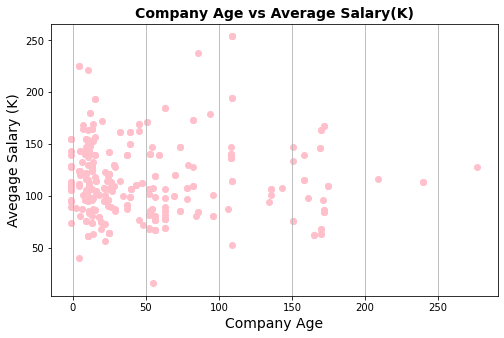

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(data_ds['Age'], data_ds['Avg Salary(K)'], color='pink')
plt.title('Company Age vs Average Salary(K)', fontweight='bold', fontsize=14)
plt.xlabel('Company Age', fontsize=14)
plt.ylabel('Avegage Salary (K)', fontsize=14)
plt.grid(axis='x');

In [ ]:
# I do not see any direct correlation between the 'Age' of the company and 'Avg Salary(K)'
# Lets perform some tests since the values of both 'Avg Salary(K)' and 'Age' are both numerical

In [ ]:
# Removing the Age = -1
data_ds_age = data_ds[data.Age != -1]
data_ds_age.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,co_revenue,co_rating,co_region
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,1,0,0,0,data scientist,na,M,Low,Medium (3-4),MidWest
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,data scientist,na,M,Medium,Medium (3-4),NorthEast


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


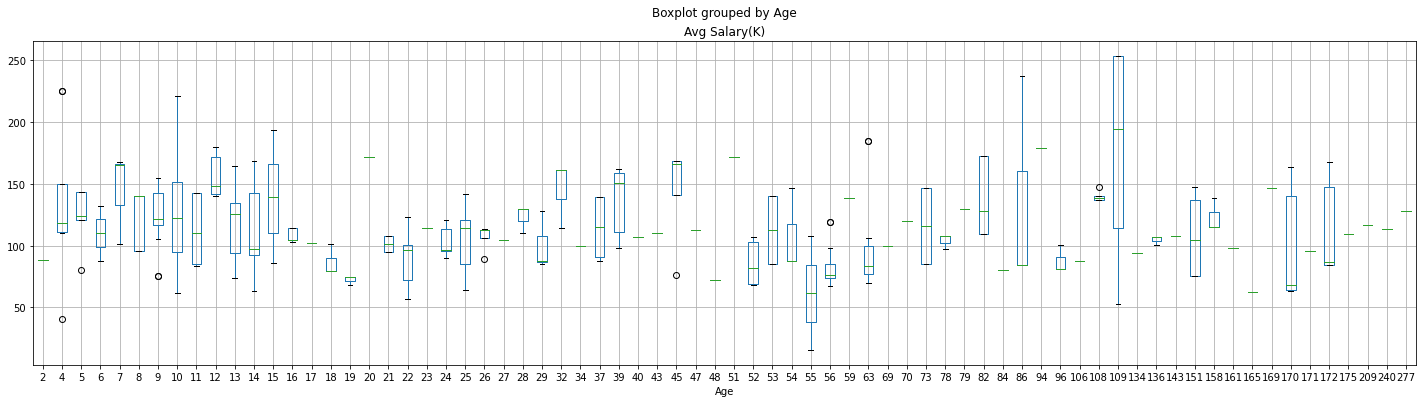

In [ ]:
data_ds_age.boxplot('Avg Salary(K)', by='Age', figsize=(24, 6));

In [ ]:
def company_by_age(age):
    if(np.isnan(age)):
        return 'unknown'
    if(age < 5):
        return 'New'
    
    elif(age < 20):
        return 'Moderate'
    
    elif(age < 50):
        return 'Known'
    
    elif(age < 100):
        return 'Well_Known'
    
    else :
        return 'Old'

In [ ]:
data_ds_age['co_age'] = data_ds_age.Age.apply(lambda x: company_by_age(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Average salaries based on company age:
 co_age
New           129.000000
Old           122.470588
Moderate      120.696262
Known         112.781690
Well_Known    105.527778
Name: Avg Salary(K), dtype: float64


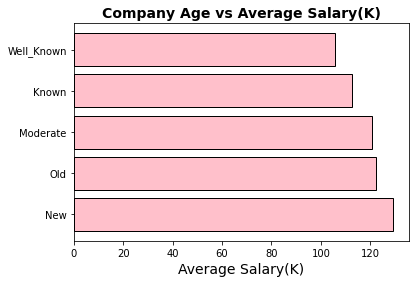

In [ ]:
data_ds_newage = data_ds_age.groupby('co_age').mean().sort_values(by = 'Avg Salary(K)', ascending = False)

plt.barh(data_ds_newage.index[:10] , data_ds_newage['Avg Salary(K)'][:10], color='pink', edgecolor='black')
plt.title('Company Age vs Average Salary(K)', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary(K)', fontsize=14)

print('Average salaries based on company age:\n', data_ds_newage['Avg Salary(K)']);

In [ ]:
# This shows that new companies < 5 years old offer the highest salaries for data scientists,
# assuming that all other factors are equal

In [ ]:
# Let's do a F_oneway test

New = data_ds_age[data_ds_age['co_age'] == 'New']
Moderate = data_ds_age[data_ds_age['co_age'] == 'Moderate']
Known = data_ds_age[data_ds_age['co_age'] == 'Known']
Well_Known = data_ds_age[data_ds_age['co_age'] == 'Well_Known']
Old = data_ds_age[data_ds_age['co_age'] == 'Old']


stats.f_oneway(New['Avg Salary(K)'], Moderate['Avg Salary(K)'], Known['Avg Salary(K)'], Well_Known['Avg Salary(K)'], Old['Avg Salary(K)'])

F_onewayResult(statistic=2.7032493928479218, pvalue=0.03065757501980341)

In [ ]:
# The p-value is just too low for there to be a significant impact

In [ ]:
# Now performing the Kruskal test for confirmation

stats.kruskal(New['Avg Salary(K)'], Moderate['Avg Salary(K)'], Known['Avg Salary(K)'], Well_Known['Avg Salary(K)'], Old['Avg Salary(K)'])

KruskalResult(statistic=12.59993209846435, pvalue=0.013405417644850114)

In [ ]:
# Since the p-value is < 0.05, there is not a significant impact salary from the company age

# **Does the size of the company impact salaries?**

In [ ]:
data_ds['Size'].head()

0     501 - 1000
1         10000+
2     501 - 1000
3    1001 - 5000
4       51 - 200
Name: Size, dtype: object

In [ ]:
# Removing the $ and other unnecessary strings and symbols
data_ds_size = data_ds['Size'].str.replace(' ','')
data_ds_size = data_ds_size.replace('to','-')
data_ds_size = data_ds_size.str.replace('+','')
data_ds_size = data_ds_size.dropna(how='all')
data_ds_size = data_ds_size.replace('10000', '-10000')
data_ds_size = data_ds_size.str.split('-').str[1]

print(data_ds_size.head(10))

0      1000
1     10000
2      1000
3      5000
4       200
5       500
6      1000
7       500
9       200
10     1000
Name: Size, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


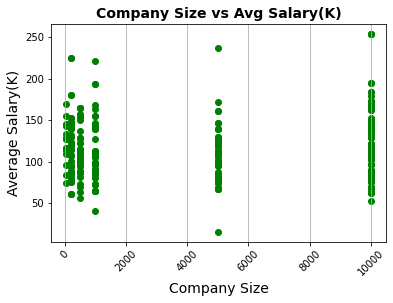

In [ ]:
data_ds_size = data_ds_size.astype(float)

plt.scatter(data_ds_size, data_ds['Avg Salary(K)'], color='green')
plt.title('Company Size vs Avg Salary(K)', fontweight='bold', fontsize=14)
plt.ylabel('Average Salary(K)', fontsize=14)
plt.xlabel('Company Size', fontsize=14)
plt.grid(axis='x')
plt.ticklabel_format()
plt.xticks(rotation=45);

In [ ]:
def company_by_size(size):
    if(size < 2000):
        return 'Small'
    
    elif(size < 6000):
        return 'Mid'
    
    else :
        return 'Large'

In [ ]:
data_ds_size['co_size'] = data_ds_size.apply(lambda x: company_by_size(x))

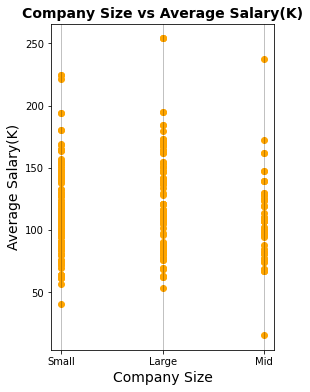

In [ ]:
plt.figure(figsize=(4,6))
plt.scatter(data_ds_size['co_size'], data_ds['Avg Salary(K)'], color='orange')
plt.title('Company Size vs Average Salary(K)', fontweight='bold', fontsize=14)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Average Salary(K)', fontsize=14)
plt.grid(axis='x', color='black', alpha=.3);

In [ ]:
# Let's run the F_oneway test

Small = data_ds[data_ds_size['co_size'] == 'Small']
Mid = data_ds[data_ds_size['co_size'] == 'Mid']
Large = data_ds[data_ds_size['co_size'] == 'Large']


stats.f_oneway(Small['Avg Salary(K)'], Mid['Avg Salary(K)'], Large['Avg Salary(K)'])

F_onewayResult(statistic=5.030321136586746, pvalue=0.007053283833872381)

In [ ]:
# Since the p-value from the F_oneway test is < 0.05, the means are not equal

In [ ]:
# let's check ttest values for each pair

print(stats.ttest_ind(Small['Avg Salary(K)'], Mid['Avg Salary(K)']))
print(stats.ttest_ind(Small['Avg Salary(K)'], Large['Avg Salary(K)']))
print(stats.ttest_ind(Mid['Avg Salary(K)'], Large['Avg Salary(K)']))

Ttest_indResult(statistic=1.9801467545287024, pvalue=0.048944751754615275)
Ttest_indResult(statistic=-1.7536572066192837, pvalue=0.08065412591590061)
Ttest_indResult(statistic=-2.9900038719819753, pvalue=0.003201491927490839)


In [ ]:
# Let's conduct a Kruskal-Wallis test

stats.kruskal(Small['Avg Salary(K)'], Mid['Avg Salary(K)'], Large['Avg Salary(K)'])

KruskalResult(statistic=9.055134991365637, pvalue=0.010806932034756096)

In [ ]:
# The p-value for the Kruskal-Wallis test is < 0.05
# therefore the means are not equal

# **Does the type of company ownership impact salaries?**

In [ ]:
print(data_ds['Type of ownership'].value_counts())

Company - Private                 180
Company - Public                  100
Nonprofit Organization             17
Government                         14
Subsidiary or Business Segment     14
College / University                2
Other Organization                  1
School / School District            1
Name: Type of ownership, dtype: int64


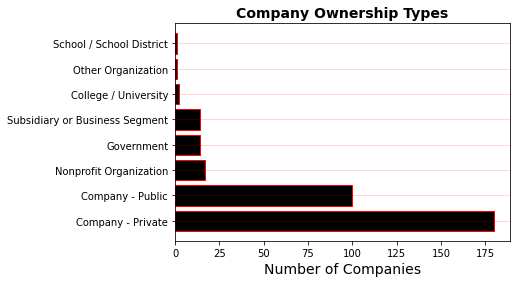

In [ ]:
# I am only going to look at all the different ownership types, even though there isn't enough data to make a justified conclusion.

plt.barh(data_ds['Type of ownership'].value_counts().index[:8] ,data_ds['Type of ownership'].value_counts().values[:8], color=('black'), edgecolor='red')
plt.title('Company Ownership Types', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies', fontsize=14)
plt.grid(axis='y', color='red', alpha=0.2);

Company - Private                 180
Company - Public                  100
Nonprofit Organization             17
Government                         14
Subsidiary or Business Segment     14
College / University                2
Other Organization                  1
School / School District            1
Name: Type of ownership, dtype: int64


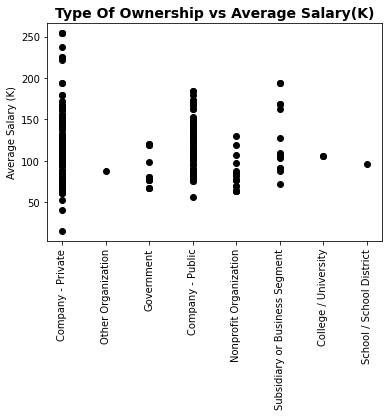

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data_ds['Type of ownership'], data_ds['Avg Salary(K)'], color=('black'))
plt.xticks(rotation=90)
plt.ylabel('Average Salary (K)')
plt.title('Type Of Ownership vs Average Salary(K)', fontweight='bold', fontsize=14);

print(data_ds['Type of ownership'].value_counts())

In [ ]:
# Let's get rid of those ownership types with minimal data

data_ds_ownership = data_ds[(data_ds['Type of ownership'] != 'Other Organization') & 
                            (data_ds['Type of ownership'] != 'School / School District') &
                            (data_ds['Type of ownership'] != 'College / University')]

Company - Private                 180
Company - Public                  100
Nonprofit Organization             17
Government                         14
Subsidiary or Business Segment     14
Name: Type of ownership, dtype: int64


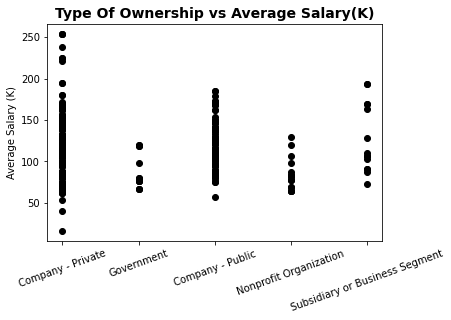

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data_ds_ownership['Type of ownership'], data_ds_ownership['Avg Salary(K)'], color=('black'))
plt.xticks(rotation=20)
plt.title('Type Of Ownership vs Average Salary(K)', fontweight='bold', fontsize=14)
plt.ylabel('Average Salary (K)');

print(data_ds_ownership['Type of ownership'].value_counts())

In [ ]:
# Even though there isn't very much data for every type of ownership other than Company - Public and Company - Private, 
# I am still going to perform a few test on all 5 types and then just focus on Company - Public vs Company - Private.

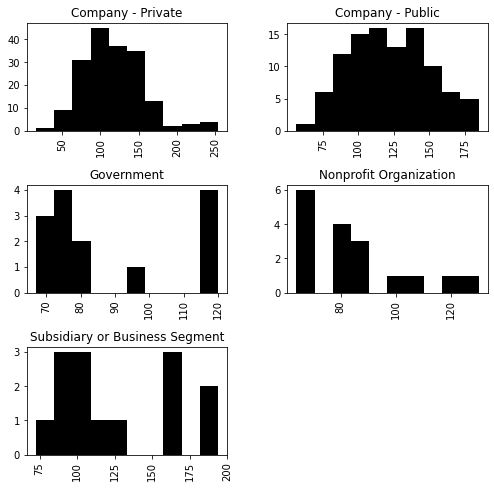

In [ ]:
data_ds_ownership['Avg Salary(K)'].hist(by = data_ds_ownership['Type of ownership'], figsize=(8,8), color='black');

In [ ]:
# Company - Public and Company - Private both appear to be normally distributed

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


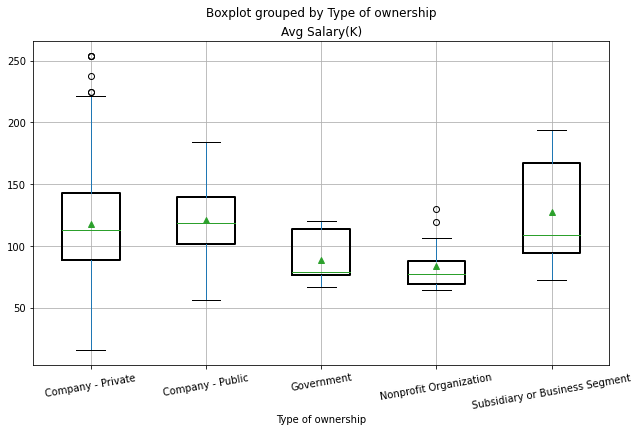

In [ ]:
boxprops = dict(linestyle='-', linewidth=2, color='black')

data_ds_ownership.boxplot('Avg Salary(K)', by='Type of ownership', figsize=(10, 6), showmeans=True, boxprops=boxprops)
plt.xticks(rotation=10)

plt.show();

In [ ]:
# Let's just focus on the Company - Public and Company - Private 
# First, let's rename those values to make it a little easier

data_ds_ownership['Type of ownership'] = data_ds_ownership['Type of ownership'].replace({'Company - Public':'Public'}).replace({'Company - Private':'Private'})
data_ds_ownership.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,co_revenue,co_rating,co_region
0,0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Private,...,1,0,0,0,data scientist,na,M,Low,Medium (3-4),MidWest
2,2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Private,...,0,0,0,0,data scientist,na,M,Low,High (4-5),South


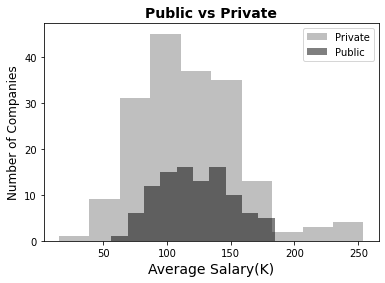

In [ ]:
comp_private = data_ds_ownership[(data_ds_ownership['Type of ownership'] == 'Private')]
comp_public = data_ds_ownership[(data_ds_ownership['Type of ownership'] == 'Public')]

plt.hist(comp_private['Avg Salary(K)'], alpha = .5, label = 'Private', color='gray')
plt.hist(comp_public['Avg Salary(K)'], alpha = .5, label = 'Public', color='black')
plt.legend(loc='upper right')
plt.title('Public vs Private', fontsize=14, fontweight='bold')
plt.xlabel('Average Salary(K)', fontsize=14)
plt.ylabel('Number of Companies', fontsize=12)
plt.show()

In [ ]:
print('Private: ', stats.describe(comp_private['Avg Salary(K)']))
print('Public:  ', stats.describe(comp_public['Avg Salary(K)']))

# Let's make sure the skewness and kurtosis are acceptable... which they both are
# Skewness is between -3 and 3
# Kurtosis is betweeen -10 and 10

Private:  DescribeResult(nobs=180, minmax=(15.5, 254.0), mean=118.025, variance=1610.9644553072626, skewness=0.9197697522339271, kurtosis=1.6024781097421394)
Public:   DescribeResult(nobs=100, minmax=(56.5, 184.5), mean=121.1, variance=804.5858585858588, skewness=0.21509093098599072, kurtosis=-0.5920969373397149)


In [ ]:
# Let's do a ttest

stats.ttest_ind(comp_private['Avg Salary(K)'], comp_public['Avg Salary(K)'])

Ttest_indResult(statistic=-0.6776275092476451, pvalue=0.4985714535303545)

In [ ]:
# The test statistic is < than 1.96 and the p-value is > than 0.05, 
# therefore we assume that the type of ownership does affect the salary

In [ ]:
# Let's get our 95% confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print('Private vs Public: ', get_95_ci(comp_private['Avg Salary(K)'], comp_public['Avg Salary(K)']))
print('Public vs Private: ', get_95_ci(comp_public['Avg Salary(K)'], comp_private['Avg Salary(K)']))
print()
print('Public mean salary is:  ', comp_public['Avg Salary(K)'].mean())
print('Private mean salary is: ', comp_private['Avg Salary(K)'].mean())

Private vs Public:  The difference in means at the 95% confidence interval (two-tail) is between -5.0052556729786275 and 11.155255672978605.
Public vs Private:  The difference in means at the 95% confidence interval (two-tail) is between -11.155255672978605 and 5.0052556729786275.

Public mean salary is:   121.1
Private mean salary is:  118.025


In [ ]:
# In conclusion, for a private company, you have a 95% chance of having a salary ranging from $5000 less to $11000 more than a public company.
# Vice-versa, for a public company, you have a 95% chance of having a salary ranging from $11000 less to $5000 more than a private company.
# Therefore, a private company would be more likely to have a higher salary...assuming all other factors equal

In [ ]:
# Let's check the state where the public and private companies are located
# to make sure its evenly spread out

print('Private companies\n', comp_private['Job Location'].value_counts().to_frame().head())
print()
print('Public companies\n', comp_public['Job Location'].value_counts().to_frame().head())

Private companies
     Job Location
CA            50
MA            23
NY            22
IL            13
VA            12

Public companies
     Job Location
CA            20
NY            17
MA            15
IL             8
VA             5


In [ ]:
# It looks like the top 5 states for each type of ownership is the same, 
# therefore I assume that cost of living is not influencing the salary of each ownership type

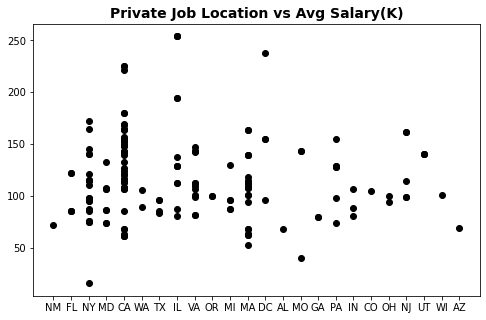

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(comp_private['Job Location'], comp_private['Avg Salary(K)'], color='black')
plt.title('Private Job Location vs Avg Salary(K)', fontsize=14, fontweight='bold');

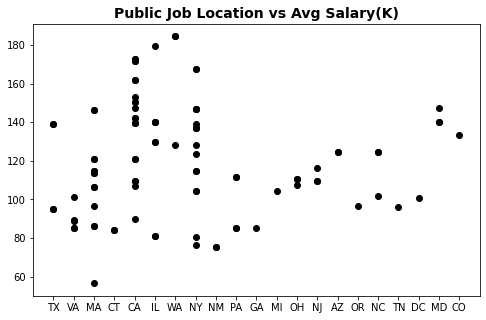

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(comp_public['Job Location'], comp_public['Avg Salary(K)'], color='black')
plt.title('Public Job Location vs Avg Salary(K)', fontsize=14, fontweight='bold');

In [ ]:
comp_private_ca = comp_private[comp_private['Job Location'] == 'CA']
print('California private average salary: ', comp_private_ca['Avg Salary(K)'].mean())
comp_public_ca = comp_public[comp_public['Job Location'] == 'CA']
print('California public average salary:  ', comp_public_ca['Avg Salary(K)'].mean())
print()

comp_private_ny = comp_private[comp_private['Job Location'] == 'NY']
print('New York private average salary: ', comp_private_ny['Avg Salary(K)'].mean())
comp_public_ny = comp_public[comp_public['Job Location'] == 'NY']
print('New York public average salary:  ', comp_public_ny['Avg Salary(K)'].mean())
print()

comp_private_ma = comp_private[comp_private['Job Location'] == 'MA']
print('Massachusetts private average salary: ', comp_private_ma['Avg Salary(K)'].mean())
comp_public_ma = comp_public[comp_public['Job Location'] == 'MA']
print('Massachusetts public average salary:  ', comp_public_ma['Avg Salary(K)'].mean())

California private average salary:  133.5
California public average salary:   141.775

New York private average salary:  104.93181818181819
New York public average salary:   127.8529411764706

Massachusetts private average salary:  103.45652173913044
Massachusetts public average salary:   109.63333333333334


I don't think that I was biased with any of my analyses. I wanted the data to be more influential to the data scientist salary, but most didn't impact the salary very much.

**Hypothesis 1: The sector of the company positively impacts the salary.**

For this hypothesis, I assumed that the sector of the company would in fact influence the salary. After sorting the data from the 'Industry' column, I looked at the counts for each sector and determined the mean of the 'Avg Salary(K)' for the top 10 sectors. The mean of the salary for all data scientists was \$116,102. The sector with the highest salary was Enterprise Software & Network Solutions with a mean salary of \$144,860. The sector with the most data scientists was Biotech & Pharmaceuticals with a mean salary of \$123,115. Other notable sectors were Computer Hardware & Software with a mean salary of \$119,017 and Insurance Carriers with a mean salary of \$129,667.

**Hypothesis 2: The revenue of the company positively impacts the salary.**

To test for the influence of the 'Revenue' of the company, I first had to clean the column a lot to eliminate the \$, strings, remove the unknown values, convert to millions and then I took the max revenue of the spread that was given. I then grouped the revenues into three groups: Low, Medium and High. Even though the 'high' revenue had the highest mean salary, the p-value of the F_oneway test was too low to determine that there was direct correlation.

**Hypothesis 3: The location of the company directly impacts the salary.**

To test if the location directly impacted the salary, I first took a loot at where most of the companies were located. California, New York, Massachusetts and Virgina had the most data scientists. I then grouped them by region with Northeast having 142, West having 104, Central having 31, South having 30 and Midwest having 22. That results with 246/329 in either Northeast or West. The F_oneway p-value was too low. Therefore, there was no direct correlation between the salary and the location.

**Hypothesis 4: The rating of the company does not impact the salary.**

The first thing I did to test for the impact of 'Rating' on the salary was to remove the (-1) rating and then group the remaining ratings in Low (0-3), Medium (3-4) and High (4-5). After performing a variety of statistical tests, I concluded that with the appropritate p-values found, the rating does impact the mean salary.

**Hypothesis 5: The age of the company positively impacts the salary.**

Since this data was from 2021, all ages were calculated based on the year it was established against 2021. I first had to remove the (-1) age value because thats impossible and then I grouped them into 5 groups: New (0-5 years), Moderate (5-20 years), Known (20-50 years), Well_Known (50-100 years) and Old (over 100 years). To my suprise, the 'New' companies actually had the highest mean salary with \$129,000 and the 'Well_Known' companies had the lowest with \$105,528. I then performed the F_oneway test and the Kruskal-Wallis test and neither showed a significant impact on salary from company age.

**Hypothesis 6: The size of the company does not impact the salary.**

In order to properly analyze the 'Size' of the company, I first had to remove the unnecessary symbols and take the max value of the spread, similar to the way the 'Revenue' column was cleaned. I then grouped them into three differend groups: Small (up to 2000), Mid (2000-6000) and Large (over 6000). After getting the data into three groups, I used a statistical analysis by performing a F_oneway test as well as a Kruskal-Wallis test. Both p-values were too low to show a significant impact salary from the size of the company. 

**Hypothesis 7: The ownership type of the company does not impact the salary.**

In order to determine if the company type impacted the salary, I had to analyze the count of the different types in order to confirm there was enough data for a valid analysis. Since Company-Public and Company-Private were the only two with enough data, I ran a series of tests on them. After performing a t-test, the p-value showed that there is a direct impact on salary in public versus private companies with the public companies having a slightly higher mean salary. I then checked the location of the public and private companies to make sure there wasn't anything unusual there and it came back with consistent locations across the country for both ownership types.

# **Conclusion**

After analyzing the impact of a variety of company factors on the average salary of data scientists, I conclude that the sector of the company has a high impact of the salary as well as the company ownership type. Other factors such as the size, age, rating, location or revenue do not have a consistent impact on the salary. If you are looking for the highest paying data scientist job, you should find one in the Enterprise Software & Network Solutions sector with a public ownership type.